In [68]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np 

ff = fits.getdata("/home/msdos/DESI-QA/sbigpics/arcth30_180-20230705-093555/20230705-111859.fits")

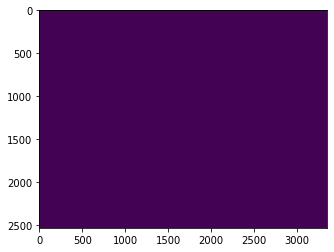

In [69]:
plt.imshow(ff)

In [66]:
if (np.unique(ff)==[0]).all():
    print('blep')
else:
    print(np.unique(ff)[-10:])
    print(len(np.unique(ff)))

[50422 50507 53299 53441 55266 58985 59063 60701 61870 65535]
2077


In [61]:
if (np.unique(ff)==[0]).all():
    print('blep')
else:
    print(np.unique(ff)[-10:])
    print(len(np.unique(ff)))

[24321 24450 29199 30143 30510 35300 35480 43207 43750 65535]
1761


In [74]:
(np.unique(ff)[-10:]<45000).any()

True

In [6]:
import pandas as pd


In [7]:
df = pd.read_csv("../output/database.csv")

In [8]:
def get_timecol(db):
    new = db.label.str.split("-", n=1, expand=True)
    new.columns = ['label', 'session']
    db['label'] = new['label']
    db.insert(1, "session", new['session'])
    db['session'] = pd.to_datetime(db['session'], format= '%Y%m%d-%H%M%S' )#.dt.time
    return 

def query_time(db, date=None, datemin=None, datemax=None):
    """
    First run get_timecol(database)
    datemin, datemax (str): e.g "2023-02-03 13:36:00"
    """
   
    if date is not None:
        return db['session'] == np.datetime64(date)
 
    dmin = [np.datetime64(datemin) if not None else None][0]
    dmax = [np.datetime64(datemax) if not None else None][0]
     
    cond1 = db["session"] >= dmin
    cond2 = db["session"] <= dmax
    if (datemin is not None) & (datemax is not None):
        return cond1 & cond2
    elif datemin is None:
        return cond2
    elif datemax is None: 
        return cond1 
    else:
        print("check datemin datemax fields")

In [10]:
get_timecol(df)

In [20]:

mvtime = pd.to_datetime(df['move'], format= '%Y%m%d-%H%M%S')

In [25]:
msk1 = mvtime < np.datetime64("2023-06-26 10:43:28")
msk2 = query_time(df, date="2023-06-26 10:03:50")
df[msk2]

,label,session,mtang1,mtang2,move,posid,direction,speed,motor,angle,xpix,ypix,xytgt,peaks,fwhm
2926,arc15_120,2023-06-26 10:03:50,90.0,90.0,20230626-100535,4852,cw,cruise,phi,0.0,1984.463243,918.044210,0,79214.0737,3.4727
2927,arc15_120,2023-06-26 10:03:50,90.0,90.0,20230626-100545,4852,cw,cruise,phi,15.0,1975.251739,942.817946,0,79764.3985,3.4642
2928,arc15_120,2023-06-26 10:03:50,90.0,90.0,20230626-100555,4852,cw,cruise,phi,15.0,1957.391733,965.032105,0,79623.0102,3.5118
2929,arc15_120,2023-06-26 10:03:50,90.0,90.0,20230626-100605,4852,cw,cruise,phi,15.0,1933.185034,980.254905,0,79896.2025,3.5197
2930,arc15_120,2023-06-26 10:03:50,90.0,90.0,20230626-100615,4852,cw,cruise,phi,15.0,1905.285786,986.856346,0,80172.4439,3.5814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,arc15_120,2023-06-26 10:03:50,0.0,0.0,20230626-104242,4852,ccw,cruise,phi,15.0,1871.445338,998.135554,0,79663.5528,3.7359
3159,arc15_120,2023-06-26 10:03:50,0.0,0.0,20230626-104251,4852,ccw,cruise,phi,15.0,1899.993791,1001.727148,0,79070.9981,3.6233
3160,arc15_120,2023-06-26 10:03:50,0.0,0.0,20230626-104301,4852,ccw,cruise,phi,15.0,1928.080572,995.848095,0,79434.3685,3.5845
3161,arc15_120,2023-06-26 10:03:50,0.0,0.0,20230626-104310,4852,ccw,cruise,phi,15.0,1952.633697,981.219507,0,78542.2205,3.5731
